Este código está basado en el video, por Rhett Allain (2021):
https://www.youtube.com/watch?v=jrUIvOp7Grk

El detalle del código puede encontrarse en 
https://rhettallain_gmail_com.trinket.io/physics-python-for-mere-mortals#/beginning-numerical-calculations/car-moving-with-a-constant-velocity 


# Introducción a la integración numérica de una ecuación de movimiento con Python.

## Caso 1: Velocidad constante

Consideremos el siguiente problema: Un cuerpo tiene un movimiento unidimensional, a lo largo del eje $x$. Su posición en $t=0$ es $x = 0$ y su velocidad es constante e igual a $0.45 m/s$. ¿Dónde estará el cuerpo en el tiempo $t = 1.5 s$?

Para responder esta pregunta, intentaremos integrar la velocidad, aplicando un sencillo método de integración numérica.

Físicamente, y de manera exacta, la velocidad es la derivada de la posición respecto del tiempo. En una dimensión, esto es
$$
v = \dfrac{d x}{d t}.
$$
Para una velocidad constante, podemos escribir
$$
v = \dfrac{\Delta x}{\Delta t}.
$$
Expandiendo el cambio de posición, se puede resolver esta igualdad para la posición final
$$
v = \dfrac{x_2 - x_1 }{\Delta t},
$$
de donde encontramos
$$
x_2 = x_1 + v_{\rm prom}\Delta t.
$$
Reemplazando, 
$$
x_2 = (0m) + (0.45 \, m/s)(1.5 \, s) = 0.675 \, m.
$$


### Dividiendo el problema en pequeñas partes 

Considere un problema similar. ¿Dónde estará el mismo cuerpo luego de 0.25 s? 

Ahora, suponga que el cuerpo continúa moviéndose por otros 0.25 s. ¿Dónde estará ahora?

¿Cuántos pasos de 0.25 segundos se necesitan para calcular la posición del cuerpo a los 1.5 s? ¿Qué pasaría si se ocupara un intervalo de tiempo de 0.1 segundos para llegar a los 1.5 s? ¿Cuántos pasos se necesitarían en este caso?

Para hacer esto debemos considerar que, si se conoce la posición $x$ de un objeto en un momento en particular, y se conoce la velocidad promedio, se puede encontrar facilmente la posición en el momento siguiente, de manera recursiva actualizando los valores de la posición. Por ejemplo, si ya calculamos la posición 2 a partir de la 1, y se quiere conocer la posición 3, se ocupa la misma fórmula ya encontrada para encontrar $x_3$ como
$$
x_3 = x_2 + v_{\rm prom} \, \Delta t,
$$
donde $\Delta t$ es el mismo intervalo de tiempo. De manera similar, para encontrar la posición $x_4$, a partir de la posición $x_3$, usamos
$$
x_4 = x_3 + v_{\rm prom} \, \Delta t.
$$
Así, ocupamos esta fórmula manera recursiva para encontrar las posiciones siguientes.


In [39]:
import numpy as np                #Se importan los módulos que usaremos 
import matplotlib.pyplot as plt
plt.style.use('bmh')

Primer cálculo: considerando un paso de 0.25 s.

In [40]:
#Se define primero las condiciones iniciales
x = 0      # Posición inicial, en metros
t = 0      # Tiempo inicial, en segundos
v = 0.45   # Velocidad promedio, en m/s

In [41]:
#Ahora, definimos el intervalo de tiempo
Dt = 0.25  #Intervalo de tiempo, en segundos

#Se hace el cálculo.
while t < 1.5:              # Control del tiempo total. El cálculo se realiza en ciclos, mientras el tiempo no supere el máximo al cual queremos llegar.
    x = x + v*Dt            # Se actualiza la posición. Puesto que esta línes está dentro de un ciclo, 
                            # corresponde a una actualización del valor inicial en cada ciclo
    t = t + Dt              # Se actualiza el tiempo total, sumándole el intervalo de tiempo que se está utilizando.
    print("t = ", t, " s,   x = ", x, " m")   # Mostramos los valores de tiempo y posición para cada paso
    

t =  0.25  s,   x =  0.1125  m
t =  0.5  s,   x =  0.225  m
t =  0.75  s,   x =  0.3375  m
t =  1.0  s,   x =  0.45  m
t =  1.25  s,   x =  0.5625  m
t =  1.5  s,   x =  0.675  m


Como se puede ver, a $t = 1.5$ s, se llega a los 0.675 m. 

Se intenta ahora hacer con un paso de tiempo de $\Delta t = 0.1$ s.

In [42]:
#Reiniciamos las variables a su valor inicial original
x = 0      # Posición inicial, en metros
t = 0      # Tiempo inicial, en segundos
v = 0.45   # Velocidad promedio, en m/s

#Ahora, definimos el intervalo de tiempo
Dt = 0.1  #Intervalo de tiempo, en segundos

#Se hace el cálculo. Misma idea de la celda de código anterior
while t < 1.5:  #
    x = x + v*Dt
    t = t + Dt
    print("t = ", t, " s,   x = ", x, " m")

t =  0.1  s,   x =  0.045000000000000005  m
t =  0.2  s,   x =  0.09000000000000001  m
t =  0.30000000000000004  s,   x =  0.135  m
t =  0.4  s,   x =  0.18000000000000002  m
t =  0.5  s,   x =  0.22500000000000003  m
t =  0.6  s,   x =  0.27  m
t =  0.7  s,   x =  0.315  m
t =  0.7999999999999999  s,   x =  0.36  m
t =  0.8999999999999999  s,   x =  0.40499999999999997  m
t =  0.9999999999999999  s,   x =  0.44999999999999996  m
t =  1.0999999999999999  s,   x =  0.49499999999999994  m
t =  1.2  s,   x =  0.5399999999999999  m
t =  1.3  s,   x =  0.585  m
t =  1.4000000000000001  s,   x =  0.63  m
t =  1.5000000000000002  s,   x =  0.675  m


Como se puede ver aquí, a $t = 1.5$ s, se llega también a los 0.675 m. 

### Solución analítica  

La solución analítica para este caso es
$$
x = x_0 + v t.
$$
Para este caso, con $v = 0.45$ m/s, y para el tiempo total $t = 1.5$ s, se encuentra que la posición final es 0.675 m, que es precisamente el valor que las celdas anteriores encuentran.

Se mostrarán las diferencias entre el resultado teórico y este cálculo analítico de manera gráfica.

In [43]:
#En esta celda se calculan los valores que van a ser graficados.

#Iniciamos las variables a su valor inicial original
x_1 = 0      # Posición inicial, en metros
t_1 = 0      # Tiempo inicial, en segundos
v = 0.45     # Velocidad promedio inicial, en m/s

#Ahora, definimos el intervalo de tiempo para el primer caso
Dt_1 = 0.25  #Intervalo de tiempo, en segundos

t_1_array = []    # Inicializamos las variables que almacenarán los resultado  en forma de arreglo, para ser graficados.
x_1_array = []    

#Se hace el cálculo.
while t_1 < 1.5: 
    x_1 = x_1 + v*Dt_1     
    t_1 = t_1 + Dt_1
    
    t_1_array.append(t_1)    # En estas dol líneas se agregan los resultados a los arreglos 
    x_1_array.append(x_1)

    

#Iniciamos las variables a su valor inicial original
x_2 = 0      # Posición inicial, en metros
t_2 = 0      # Tiempo inicial, en segundos
 
       
#Ahora, definimos el intervalo de tiempo
Dt_2 = 0.1  #Intervalo de tiempo, en segundos

t_2_array = []
x_2_array = []


#Se hace el cálculo.
while t_2 < 1.5:  
    x_2 = x_2 + v*Dt_2     
    t_2 = t_2 + Dt_2

    t_2_array.append(t_2)
    x_2_array.append(x_2)


# hacer el scatter de la diferencia entre el numérico y el analítico
# hacer una versión con arreglos de numpy, areglos para el tiempo, y append para las salidas de la posición, y graficar los arreglos
# array de nunmpy para la solución analítica


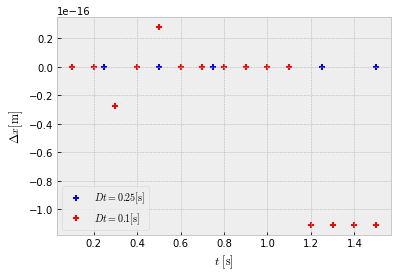

In [44]:
def solucion_analitica(t):
    return 0.45*t 

x_1_analitico = solucion_analitica(np.array(t_1_array))
x_2_analitico = solucion_analitica(np.array(t_2_array))

plt.scatter(t_1_array,x_1_array-x_1_analitico, c='blue', marker='+', label='$Dt = 0.25 \\rm [s]$')
plt.scatter(t_2_array,x_2_array-x_2_analitico, c='red', marker='+', label='$Dt = 0.1 \\rm [s]$')

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$\Delta x \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.legend(loc = 'lower left')
plt.show()


Como se puede ver, no hay diferencia entre la solución analítica y numérica (hay diferencia, pero es despreciable, atribuible a errores numéricos).

## Caso 2: Aceleración constante

Consideremos ahora el caso en que el mismo cuerpo comienza su movimiento en $x=0$ con una velocidad de $0.45 m/s$ en el tiempo $t = 0 s$. Pero ahora, tiene una aceleración de 0.2 ${m/s}^2$. ¿Dónde estará en cuerpo en el tiempo $t = 1.5 s$?

Para responder esta pregunta, intentaremos integrar la aceleración, aplicando un procedimiento similar al anteriormente usado.

La aceleración de define como la derivada de la velocidad respecto del tiempo. En una dimensión, esto es
$$
a = \dfrac{d v}{d t}.
$$
Para una aceleración constante (o promedio), podemos escribir
$$
a = \dfrac{\Delta v}{\Delta t} = \dfrac{v_2 - v_1 }{\Delta t},
$$
de donde se obtiene que
$$
v_2 = v_1 + a \Delta t.
$$

### Partiendo el problema en pequeñas partes 

Consideremos este problema tomando pequeños intervalos de 0.25 s. Aún podemos usar la fórmula ya obtenida para actualizar la posición. Pero, ¿qué pasa con la velocidad? Se puede usar la expresión anterior para actualizar la velocidad:
$$
v_2 = v_1 + a \Delta t.
$$
Así, en cada paso uno puede calcular la nueva velocidad ocupando la aceleración, la antigua velocidad, y el intervalo de tiempo, es decir,
$$
v_3 = v_2 + a \Delta t,
$$
$$
v_4 = v_3 + a \Delta t,
$$
y así sucesivamente.


Pero, ¿qué pasa con la posición en este caso? Aún podemos usar la expresión anterior $x_2 = x_1 + v_{prom} \Delta t$ para calcularla pero, en este caso la velocidad va variando en el tiempo. Por esto, debemos elegir qué valor de la velocidad usaremos para el cálculo numérico. En este ejemplo, usaremos la velocidad final $v_2$ como aproximación de la velocidad promedio $v_{prom}$ para actualizar la posición. Esto es una buena aproximación si es que $\Delta t$ es suficientemente pequeño. De esta manera, los cálculos se harán en los siguientes pasos:

- Actualizar la velocidad a partir de la expresión $v_{i + 1} = v_i + a \Delta t$, con $i = 1, 2, 3, ...$.
- Actualizar la posición a partir de su expresión, ocupando la velocidad nueva, es decir, $x_{i + 1} = x_i + v_{i + 1} \Delta t.$
- Actualizar el tiempo, $t_{i + 1} = t_i + \Delta t $, hasta llegar a $t = 1.5$ s.


### Primer cálculo: considerando un paso de 0.25 s.

In [45]:
#Iniciamos las variables a su valor inicial original
x = 0      # Posición inicial, en metros
t = 0      # Tiempo inicial, en segundos
v = 0.45   # Velocidad promedio inicial, en m/s
a = 0.2    #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt = 0.25  #Intervalo de tiempo, en segundos

#Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
while t < 1.5:  #
    v = v + a*Dt
    x = x + v*Dt     
    t = t + Dt
    print("t = ", t, " s,   x = ", x, " m")

t =  0.25  s,   x =  0.125  m
t =  0.5  s,   x =  0.2625  m
t =  0.75  s,   x =  0.41250000000000003  m
t =  1.0  s,   x =  0.5750000000000001  m
t =  1.25  s,   x =  0.7500000000000001  m
t =  1.5  s,   x =  0.9375000000000002  m


Como se puede ver, a $t = 1.5$ s, obtenemos que $x= 0.9375$ m. 

Se intenta ahora hacer con un paso de tiempo de $\Delta t = 0.1$ s.

In [46]:
#Iniciamos las variables a su valor inicial original
x = 0      # Posición inicial, en metros
t = 0      # Tiempo inicial, en segundos
v = 0.45   # Velocidad promedio inicial, en m/s
a = 0.2    #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt = 0.1  #Intervalo de tiempo, en segundos

#Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
while t < 1.5:  #
    v = v + a*Dt
    x = x + v*Dt     
    t = t + Dt
    print("t = ", t, " s,   x = ", x, " m")

t =  0.1  s,   x =  0.04700000000000001  m
t =  0.2  s,   x =  0.09600000000000002  m
t =  0.30000000000000004  s,   x =  0.14700000000000002  m
t =  0.4  s,   x =  0.2  m
t =  0.5  s,   x =  0.255  m
t =  0.6  s,   x =  0.312  m
t =  0.7  s,   x =  0.371  m
t =  0.7999999999999999  s,   x =  0.432  m
t =  0.8999999999999999  s,   x =  0.495  m
t =  0.9999999999999999  s,   x =  0.56  m
t =  1.0999999999999999  s,   x =  0.6270000000000001  m
t =  1.2  s,   x =  0.6960000000000002  m
t =  1.3  s,   x =  0.7670000000000002  m
t =  1.4000000000000001  s,   x =  0.8400000000000003  m
t =  1.5000000000000002  s,   x =  0.9150000000000004  m


Para este caso, a $t = 1.5$ s la posición final es $x= 0.915$ m, valor $\textit{distinto}$ al del caso anterior. 

Se intenta ahora una tercera vez, con un paso de tiempo de $\Delta t = 0.05$ s.

In [47]:
#Iniciamos las variables a su valor inicial original
x = 0      # Posición inicial, en metros
t = 0      # Tiempo inicial, en segundos
v = 0.45   # Velocidad promedio inicial, en m/s
a = 0.2    #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt = 0.05  #Intervalo de tiempo, en segundos

#Se hace el cálculo, antualizando las variables de velocidad, posición y tiempo.
while t < 1.5:  #
    v = v + a*Dt
    x = x + v*Dt     
    t = t + Dt
    print("t = ", t, " s,   x = ", x, " m")

t =  0.05  s,   x =  0.023000000000000003  m
t =  0.1  s,   x =  0.04650000000000001  m
t =  0.15000000000000002  s,   x =  0.07050000000000001  m
t =  0.2  s,   x =  0.09500000000000001  m
t =  0.25  s,   x =  0.12000000000000002  m
t =  0.3  s,   x =  0.14550000000000002  m
t =  0.35  s,   x =  0.1715  m
t =  0.39999999999999997  s,   x =  0.198  m
t =  0.44999999999999996  s,   x =  0.225  m
t =  0.49999999999999994  s,   x =  0.2525  m
t =  0.5499999999999999  s,   x =  0.2805  m
t =  0.6  s,   x =  0.30900000000000005  m
t =  0.65  s,   x =  0.3380000000000001  m
t =  0.7000000000000001  s,   x =  0.3675000000000001  m
t =  0.7500000000000001  s,   x =  0.39750000000000013  m
t =  0.8000000000000002  s,   x =  0.42800000000000016  m
t =  0.8500000000000002  s,   x =  0.4590000000000002  m
t =  0.9000000000000002  s,   x =  0.4905000000000002  m
t =  0.9500000000000003  s,   x =  0.5225000000000002  m
t =  1.0000000000000002  s,   x =  0.5550000000000002  m
t =  1.0500000000000003 

Como puede verse, para este último caso, a $t = 1.5$ s, se llega a los 0.9075 m, que es un valor $\textit{distinto}$ a los dos casos anteriores. ¿Qué está pasando?


### Solución analítica 
Como se puede ver de las celdas anteriores, el valor final para la posición es distinto para los 3 casos estudiados. Sin embargo, parece acercarse a 0.9 m a medida que el intervalo de tiempo se hace más pequeño.

Recordemos que para este caso la solución analítica es
$$
x(t) = x_0 + v_0 t + \dfrac{a}{2} t^2.
$$
Con los datos que tenemos, es decir, $v_0 = 0.45$ m/s, $a = 0.2$ m/s^2, y $t = 1.5$ s, se obtiene que la posición final es de 0.9 m. Como se puede ver, nuestro cálculo numérico parece converger a este valor a medida que el intervalo de tiempo $\Delta t$ es más pequeño. Esto tiene sentido, pues la solución analítica se construye como una solución de una ecuación diferencial, donde el tiempo es infinitesimal. Por eso es que la solución numérica se aproxima a la analítica cuando el intervalo de tiempo se hace cada vez más pequeño.

Se mostrarán las diferencias entre el resultado teórico y este cálculo analítico de manera gráfica.

In [48]:
#Iniciamos las variables a su valor inicial original
x_1 = 0      # Posición inicial, en metros
t_1 = 0      # Tiempo inicial, en segundos
v_1 = 0.45   # Velocidad promedio inicial, en m/s
a = 0.2    #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt_1 = 0.25  #Intervalo de tiempo, en segundos

t_1_array = []
x_1_array = []

#Se hace el cálculo.
while t_1 < 1.5:  #
    v_1 = v_1 + a*Dt_1
    x_1 = x_1 + v_1*Dt_1     
    t_1 = t_1 + Dt_1
    
    t_1_array.append(t_1)
    x_1_array.append(x_1)

    

#Iniciamos las variables a su valor inicial original
x_2 = 0      # Posición inicial, en metros
t_2 = 0      # Tiempo inicial, en segundos
v_2 = 0.45   # Velocidad promedio inicial, en m/s
          #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt_2 = 0.1  #Intervalo de tiempo, en segundos

t_2_array = []
x_2_array = []


#Se hace el cálculo.
while t_2 < 1.5:  #
    v_2 = v_2 + a*Dt_2
    x_2 = x_2 + v_2*Dt_2     
    t_2 = t_2 + Dt_2

    t_2_array.append(t_2)
    x_2_array.append(x_2)

#Iniciamos las variables a su valor inicial original
x_3 = 0      # Posición inicial, en metros
t_3 = 0      # Tiempo inicial, en segundos
v_3 = 0.45   # Velocidad promedio inicial, en m/s
          #Aceleración, en m/s^2

#Ahora, definimos el intervalo de tiempo
Dt_3 = 0.05  #Intervalo de tiempo, en segundos

t_3_array = []
x_3_array = []

#Se hace el cálculo.
while t_3 < 1.5:  #
    v_3 = v_3 + a*Dt_3
    x_3 = x_3 + v_3*Dt_3     
    t_3 = t_3 + Dt_3
    
    t_3_array.append(t_3)
    x_3_array.append(x_3)
# hacer el scatter de la diferencia entre el numérico y el analítico
# hacer una versión con arreglos de numpy, areglos para el tiempo, y append para las salidas de la posición, y graficar los arreglos
# array de nunmpy para la solución analítica



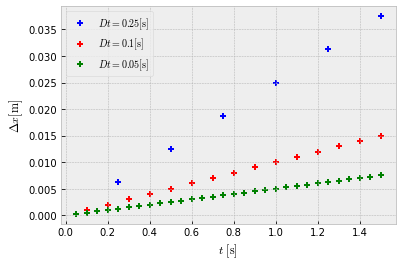

In [49]:
def solucion_analitica(t):
    return 0.45*t + 0.2*t**2/2

x_1_analitico = solucion_analitica(np.array(t_1_array))
x_2_analitico = solucion_analitica(np.array(t_2_array))
x_3_analitico = solucion_analitica(np.array(t_3_array))

plt.scatter(t_1_array,x_1_array-x_1_analitico, c='blue', marker='+', label='$Dt = 0.25 \\rm [s]$')
plt.scatter(t_2_array,x_2_array-x_2_analitico, c='red', marker='+', label='$Dt = 0.1 \\rm [s]$')
plt.scatter(t_3_array,x_3_array-x_3_analitico, c='green', marker='+', label='$Dt = 0.05 \\rm [s]$')

plt.grid(True)              # Ponemos una grilla en el gráfico, para ver mejor cómo cambian las variables.
plt.xlabel('$t\ \\rm [s]$') # Etiqueta del eje x, escrita en entorno matemático LaTeX
plt.ylabel('$\Delta x \\rm [m]$') # Etiqueta del eje y
#plt.savefig('x_vs_t.png')
plt.legend()
plt.show()


Como se puede ver, mientras más pequeño sea el intervalo de tiempo, más pequeña es la diferencia entre las soluciones analítica y numérica. Como se mencionó, esto tiene sentido pues la solución analítica se construye como una solución de una ecuación diferencial, donde el tiempo es infinitesimal.